In [72]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [73]:
data = pd.read_csv('preprocessed_diabetes_dataset.csv')

data.head()

,id,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,1,0,1,0,1,26,0,0,0,1,...,1,0,1,0,3,5.0,30.0,0.0,1.0,4.0
1,2,0,1,1,1,26,1,1,0,0,...,0,0,1,0,3,0.0,0.0,0.0,1.0,12.0
2,3,0,0,0,1,26,0,0,0,1,...,1,0,1,0,1,0.0,10.0,0.0,1.0,13.0
3,4,0,1,1,1,28,1,0,0,1,...,1,0,1,0,3,0.0,3.0,0.0,1.0,11.0
4,5,0,1,1,1,35,1,0,1,1,...,1,0,1,0,2,0.0,0.0,0.0,1.0,10.0


In [74]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

data.head()

,id,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,3426,0,1,1,1,30,0,0,1,0,...,1,0,1,0,4,0.0,5.0,1.0,0.0,13.0
1,26370,0,0,1,1,25,0,0,0,0,...,1,0,1,0,2,1.0,1.0,0.0,1.0,8.0
2,23960,0,0,0,1,28,0,0,0,1,...,1,0,1,0,1,0.0,2.0,0.0,1.0,2.0
3,10181,0,0,0,1,23,0,0,0,1,...,0,0,1,0,2,0.0,3.0,0.0,0.0,2.0
4,5224,0,0,0,1,27,1,0,0,1,...,1,0,1,0,1,0.0,0.0,0.0,0.0,8.0


In [75]:
data = data.drop(columns=['id'])

data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0,1,1,1,30,0,0,1,0,0,1,0,1,0,4,0.0,5.0,1.0,0.0,13.0
1,0,0,1,1,25,0,0,0,0,0,1,0,1,0,2,1.0,1.0,0.0,1.0,8.0
2,0,0,0,1,28,0,0,0,1,1,1,0,1,0,1,0.0,2.0,0.0,1.0,2.0
3,0,0,0,1,23,0,0,0,1,1,0,0,1,0,2,0.0,3.0,0.0,0.0,2.0
4,0,0,0,1,27,1,0,0,1,1,1,0,1,0,1,0.0,0.0,0.0,0.0,8.0


In [76]:
X = data.drop("Diabetes_binary", axis=1) 

y = data["Diabetes_binary"]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [78]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [79]:
y_pred = rf_model.predict(X_test)

In [80]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 72.99%


In [81]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[11968  5415]
 [ 4050 13611]]


In [82]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72     17383
           1       0.72      0.77      0.74     17661

    accuracy                           0.73     35044
   macro avg       0.73      0.73      0.73     35044
weighted avg       0.73      0.73      0.73     35044



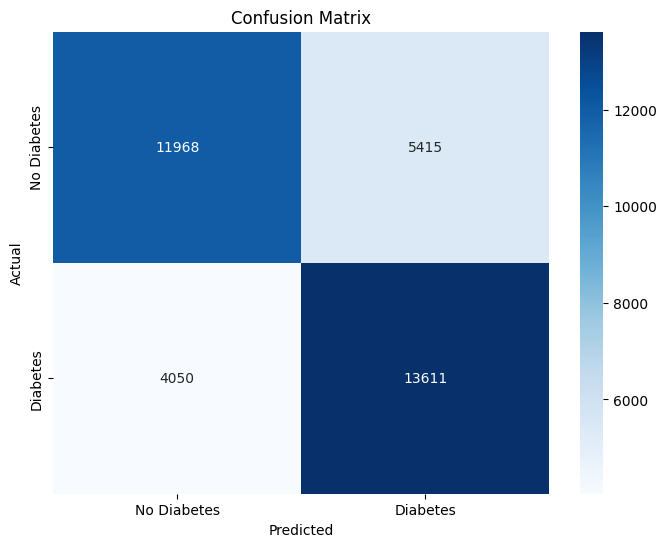

In [83]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [84]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index=X.columns,
                                   columns=["Importance"]).sort_values("Importance", ascending=False)

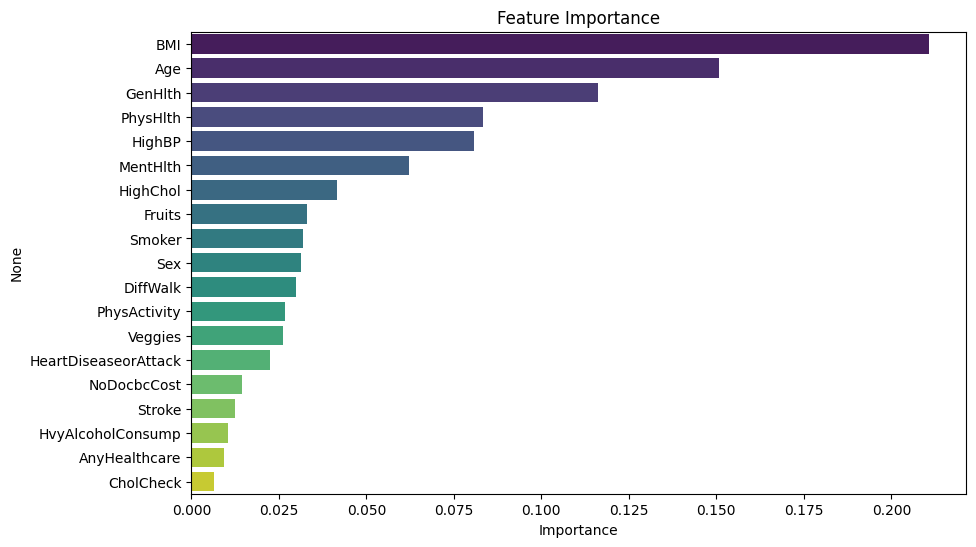

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y=feature_importances.index, data=feature_importances, palette="viridis", hue=feature_importances.index, legend=False)
plt.title("Feature Importance")
plt.show()